<a href="https://colab.research.google.com/github/mintra-tippayaratsontorn/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'มินตรา ทิพยรัตน์สุนทร'
ID = '623020041-2'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:21


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.075284,-4.698610,-1.796113,2.573403,5.392528,10.443115,2.936573,-0.189635,-7.934688,-0.762363,-2.573792,-5.407818,3.099271,9.654666,4.113177,1.498262,1.743397,8.195469,9.271724,5.936310,-4.687235,-4.340322,9.866275,0.468506,-0.754849,1.375600,4.734555,5.078867,0.523719,8.083784,-9.397219,42.418922
1,2.256112,8.518886,8.979545,7.161781,-10.400533,3.802111,-1.000701,0.184998,2.001371,-7.012582,-4.228139,4.328138,5.361476,6.371868,5.568158,-8.445997,-8.090063,4.859351,-5.967270,-4.406233,5.934493,10.004309,-0.279969,-6.497705,6.070259,2.203129,3.469625,6.208171,0.377686,0.121612,17.037773,2.608059
2,-4.591993,-10.669221,-3.033714,-7.941222,-3.385107,1.151519,-8.766998,-10.024388,3.863638,1.385751,-3.745489,-3.573622,-0.792904,-1.293412,-6.647738,11.117316,8.177635,6.614461,-9.780989,-9.422319,-8.674050,0.682759,3.058647,4.731224,5.171247,3.373287,-9.048570,0.863685,5.630171,-5.956894,-21.338442,-27.784471
3,4.758277,4.650678,3.417744,7.633664,-2.668778,-8.866351,6.640300,8.029495,-0.190749,6.538543,-1.583843,8.216617,4.404266,1.673135,10.348315,9.928181,6.842507,-2.705591,-9.555843,6.733607,-8.028439,-5.219506,-3.808931,9.797888,-4.350369,-3.533076,-2.854182,-8.573982,0.189384,-8.423114,9.301356,-40.115568
4,4.064698,7.523146,-9.102260,-6.640667,9.335034,1.352716,9.313866,2.225078,5.140301,-2.074142,5.902454,-0.412591,-2.478493,-2.306601,-0.877745,7.565374,-1.823563,-2.281004,-2.832499,1.272504,2.267397,-6.968854,2.769761,-4.333420,8.371068,-8.833340,5.678846,-2.901228,-8.408941,5.386016,15.046292,28.930082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.138307,4.983342,1.339236,8.088569,-10.446501,-5.529515,10.334767,-7.225092,4.129994,-0.540194,-9.210808,3.844797,6.914146,0.271029,-5.131648,-5.780360,6.674650,6.924942,6.454967,9.115160,-4.490058,-4.422617,-2.889046,-7.533495,-7.009099,-1.219168,-7.463350,7.159741,5.096300,-7.878508,9.966685,-37.392539
9996,9.447729,-10.343070,-7.072834,-2.435520,6.592739,12.163324,8.033275,3.114361,-2.093757,-0.516587,3.299198,4.476070,7.310476,-2.404773,7.754966,6.011323,-5.071566,2.357294,8.332472,-11.877982,-7.461121,8.524154,7.137896,5.009467,5.933162,-6.094294,-7.637146,5.677159,-0.870917,4.543106,-20.686139,24.715530
9997,3.311942,2.666463,3.484471,5.891362,-2.491019,-9.337824,5.691715,5.384492,0.614234,7.759929,-0.842790,5.305373,4.363303,2.617577,10.079838,7.306719,7.019005,-1.421492,-10.933845,7.932982,-9.746023,-1.886430,-4.153681,8.732104,-6.278363,-4.614760,-3.915977,-9.051466,1.071257,-9.172472,5.332926,-43.862361
9998,1.248170,-7.797526,5.100480,11.057906,-0.959574,2.284569,-2.644382,6.240631,-8.954249,7.577219,6.391494,-0.025679,1.956391,5.588021,0.656975,-2.679199,-6.405252,5.709901,3.584074,0.743031,8.051099,-5.383952,-3.905264,-4.378429,-3.166401,3.127415,-9.488871,2.606443,3.857692,-10.920978,-15.595052,-52.604891


ทำการเตรียมข้อมูลก่อนจะนำข้อมูลไปใช้ โดยการตัดตัวที่มี correlation กันออกไป เพื่อลดข้อมูลที่เหมือนกันออกจาก Data

In [7]:
Data.shape # เช็คขนาดของข้อมูล

(10000, 32)

In [8]:
corr = np.corrcoef(Data.to_numpy().T)

In [9]:
corr.shape # เช็คขนาดของ corrcoef ของ Data

(32, 32)

In [10]:
#ทำการวนลูปหาค่า correlation ที่ซ้ำกัน
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


จากการวนลูป พบว่า correlation มีตัวซ้ำกัน จึงต้องตัดข้อมูลที่ซ้ำกันออกก่อน

In [30]:
Data.iloc[1:,:31]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,2.256112,8.518886,8.979545,7.161781,-10.400533,3.802111,-1.000701,0.184998,2.001371,-7.012582,-4.228139,4.328138,5.361476,6.371868,5.568158,-8.445997,-8.090063,4.859351,-5.967270,-4.406233,5.934493,10.004309,-0.279969,-6.497705,6.070259,2.203129,3.469625,6.208171,0.377686,0.121612,17.037773
2,-4.591993,-10.669221,-3.033714,-7.941222,-3.385107,1.151519,-8.766998,-10.024388,3.863638,1.385751,-3.745489,-3.573622,-0.792904,-1.293412,-6.647738,11.117316,8.177635,6.614461,-9.780989,-9.422319,-8.674050,0.682759,3.058647,4.731224,5.171247,3.373287,-9.048570,0.863685,5.630171,-5.956894,-21.338442
3,4.758277,4.650678,3.417744,7.633664,-2.668778,-8.866351,6.640300,8.029495,-0.190749,6.538543,-1.583843,8.216617,4.404266,1.673135,10.348315,9.928181,6.842507,-2.705591,-9.555843,6.733607,-8.028439,-5.219506,-3.808931,9.797888,-4.350369,-3.533076,-2.854182,-8.573982,0.189384,-8.423114,9.301356
4,4.064698,7.523146,-9.102260,-6.640667,9.335034,1.352716,9.313866,2.225078,5.140301,-2.074142,5.902454,-0.412591,-2.478493,-2.306601,-0.877745,7.565374,-1.823563,-2.281004,-2.832499,1.272504,2.267397,-6.968854,2.769761,-4.333420,8.371068,-8.833340,5.678846,-2.901228,-8.408941,5.386016,15.046292
5,-0.246557,-4.607385,-5.778780,10.796800,-0.589336,4.514283,-7.142820,4.622553,1.802229,4.926592,6.993928,5.058602,-1.335261,8.396732,-9.830436,6.729097,9.187387,1.251539,2.593605,9.729436,-3.440111,-0.618286,-0.154595,5.869247,-9.834971,-7.734017,-7.744722,6.196382,-4.114553,2.461718,-9.214770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.138307,4.983342,1.339236,8.088569,-10.446501,-5.529515,10.334767,-7.225092,4.129994,-0.540194,-9.210808,3.844797,6.914146,0.271029,-5.131648,-5.780360,6.674650,6.924942,6.454967,9.115160,-4.490058,-4.422617,-2.889046,-7.533495,-7.009099,-1.219168,-7.463350,7.159741,5.096300,-7.878508,9.966685
9996,9.447729,-10.343070,-7.072834,-2.435520,6.592739,12.163324,8.033275,3.114361,-2.093757,-0.516587,3.299198,4.476070,7.310476,-2.404773,7.754966,6.011323,-5.071566,2.357294,8.332472,-11.877982,-7.461121,8.524154,7.137896,5.009467,5.933162,-6.094294,-7.637146,5.677159,-0.870917,4.543106,-20.686139
9997,3.311942,2.666463,3.484471,5.891362,-2.491019,-9.337824,5.691715,5.384492,0.614234,7.759929,-0.842790,5.305373,4.363303,2.617577,10.079838,7.306719,7.019005,-1.421492,-10.933845,7.932982,-9.746023,-1.886430,-4.153681,8.732104,-6.278363,-4.614760,-3.915977,-9.051466,1.071257,-9.172472,5.332926
9998,1.248170,-7.797526,5.100480,11.057906,-0.959574,2.284569,-2.644382,6.240631,-8.954249,7.577219,6.391494,-0.025679,1.956391,5.588021,0.656975,-2.679199,-6.405252,5.709901,3.584074,0.743031,8.051099,-5.383952,-3.905264,-4.378429,-3.166401,3.127415,-9.488871,2.606443,3.857692,-10.920978,-15.595052


#2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

In [31]:
# Import 
from sklearn.cluster import KMeans

Import
* import function ที่ต้องการใช้ในการทำ K-mean จาก sklearn.cluster



In [32]:
# Defind 
kmeans = KMeans(n_clusters=3,random_state=2021)

Defind
*  กำหนดค่า k ที่เราต้องการ (ถ้ามีค่า defult ไม่จำเป็นต้องกำหนดค่า k ก็ได้)
*   random_state=2021 คือกำหนดให้เริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มที่เหมือนกัน




In [33]:
# Fit-tranform
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

Fit-tranform
* คำนวณจุด Cluster center ของข้อมูล Data ด้วยวิธี K-means clustering

In [34]:
#แสดงจุดที่คำนวณได้
kmeans.cluster_centers_

array([[-8.16151767e-01, -1.84758040e+00, -1.52449266e+00,
         8.44410857e-01, -2.65291922e-01, -5.48448758e-01,
        -6.13576057e-01, -2.83073583e+00, -1.29244198e+00,
         3.39404361e+00,  6.60132652e-01,  2.16080330e+00,
         2.91630841e+00,  3.97753092e+00, -1.57814277e+00,
         5.80253297e-01,  3.17792778e+00,  1.96273218e+00,
        -3.35796823e+00,  1.58583016e+00, -1.58307902e+00,
        -3.69561038e-01, -2.06996906e+00,  4.42750940e-02,
        -1.42464231e+00, -1.87011543e-02, -1.52446073e+00,
        -1.90823535e+00,  1.43698578e+00, -7.18138414e+00,
        -3.69516080e+00, -3.39069207e+01],
       [ 1.29609109e+00,  2.70233340e+00, -2.20401243e+00,
         1.49390482e+00,  1.34892749e+00, -1.65622485e+00,
         2.67608974e+00,  2.06124709e+00,  4.00386885e+00,
        -2.23180600e+00,  7.09227303e-01, -4.26574423e-01,
        -1.38912563e+00, -1.12422906e+00, -3.93099446e+00,
        -4.50634641e-01, -6.89687693e-02,  1.76720219e+00,
         1.48

In [35]:
#ทดสอบการจัดกลุ่มของ Data
y = kmeans.predict(Data)
y

array([2, 1, 0, ..., 0, 0, 0], dtype=int32)

ทำ PCA ลด Dimention

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)

In [19]:
new_pca = pca.fit_transform(Data)

plot กราฟเพื่อดูการกระจายกลุ่ม

In [20]:
import matplotlib.pyplot as plt

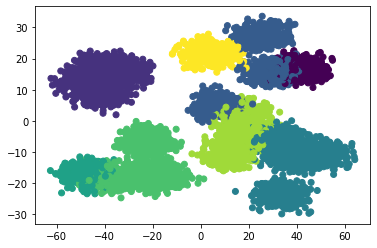

In [21]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

หาค่า k ที่เหมาะสมของ data ด้วยวิธี " The elbow method "

In [22]:
#คำนวนค่า SSE ของ data
kmeans.inertia_ 

6950435.178544457

In [23]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [24]:
SSE

[21524218.111485694,
 12632337.932196785,
 11167069.793777393,
 9982568.8212212,
 9213686.155533906,
 8378635.732941387,
 7539813.617160626,
 6950435.178544457]

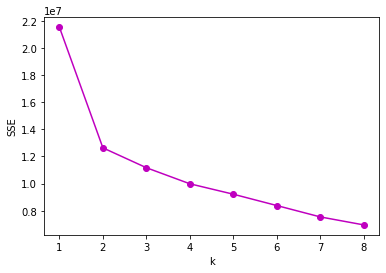

In [25]:
#นำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่กลุ่ม
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-m')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟจะเห็นได้ว่า k มี 3 กลุ่ม ดูจากจุดที่ k ที่
ใช้วิธีการหาค่า k ด้วยวิธี " The silhouette coefficient "

In [26]:
#import function metrics มาใช้
from sklearn import metrics

In [27]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

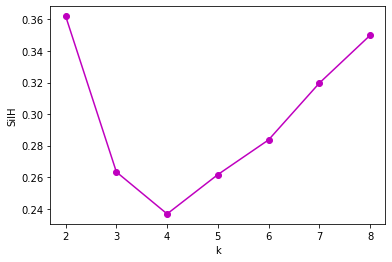

In [28]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-m')
plt.xlabel('k')
plt.ylabel('SilH');

จากกราฟจะเห็นได้ว่า k มี 3 กลุ่ม ดูได้จากจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วงที่ k เท่ากับ 2 , 3 และ 6

ลองนำค่า k ที่ได้มาแบ่งกลุ่มอีกครั้ง



In [ ]:
# กำหนดขนาดกราฟ เพื่อดูข้อมูลได้ชัดเจนมากขึ้น
plt.rcParams['figure.figsize']=[15,20] 

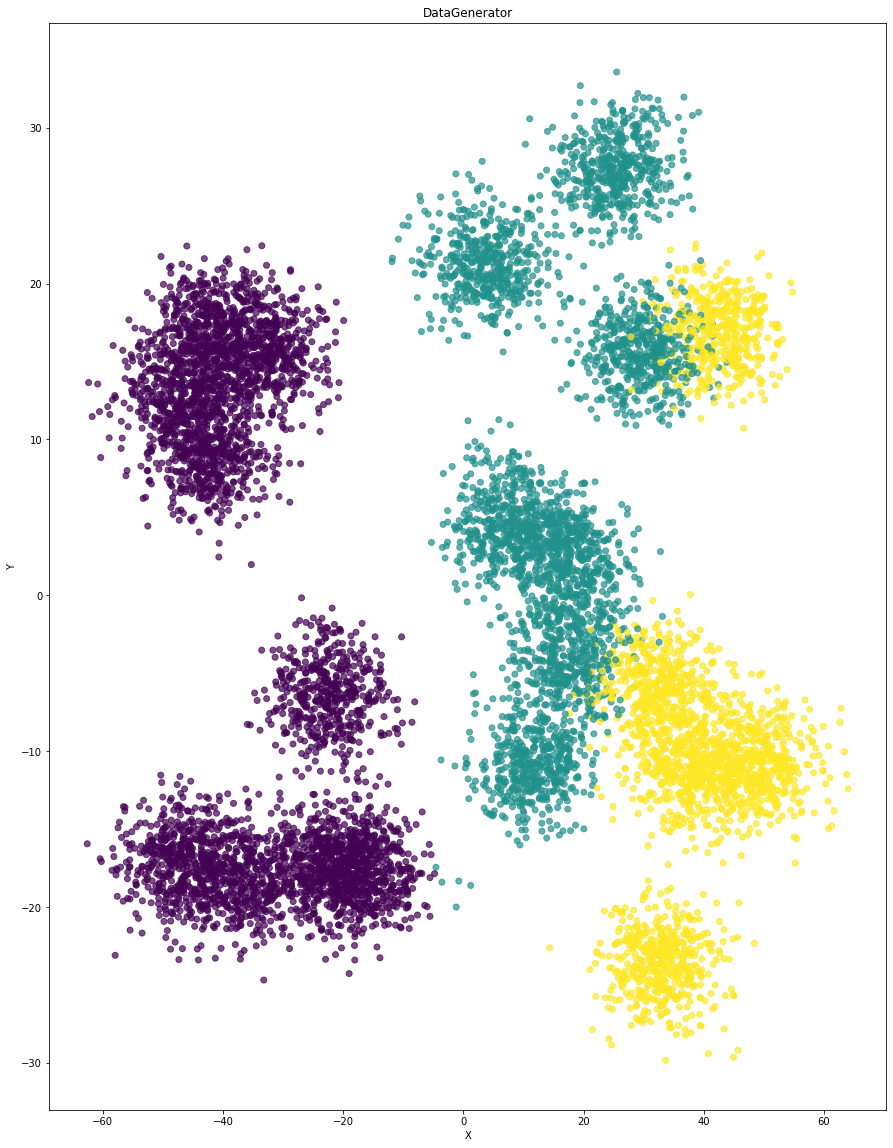

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

กราฟ -> เมื่อจัดกลุ่ม k ให้เท่ากับ 4 กลุ่มแล้ว มีข้อมูลบางจำนวนที่ทับซ้อนกัน และมีข้อมูลเป็นจำนวนมาก

# 3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

### MDS

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2)
# กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [ ]:
New_mds = mds.fit_transform(Data)
# ทำการคำนวณข้อมูล คำนวณระยะห่างระหว่างจุด

### K-means

In [ ]:
kmeans2 = KMeans(n_clusters=4,random_state=2021)  # กำหนด k = 4 ตามค่า k ที่เหมาะสม
kmeans2.fit(Data)
g = kmeans2.predict(Data)

กำหนดกลุ่ม k = 4 ตามการหาค่า k ที่เหมาะสมข้างต้น 


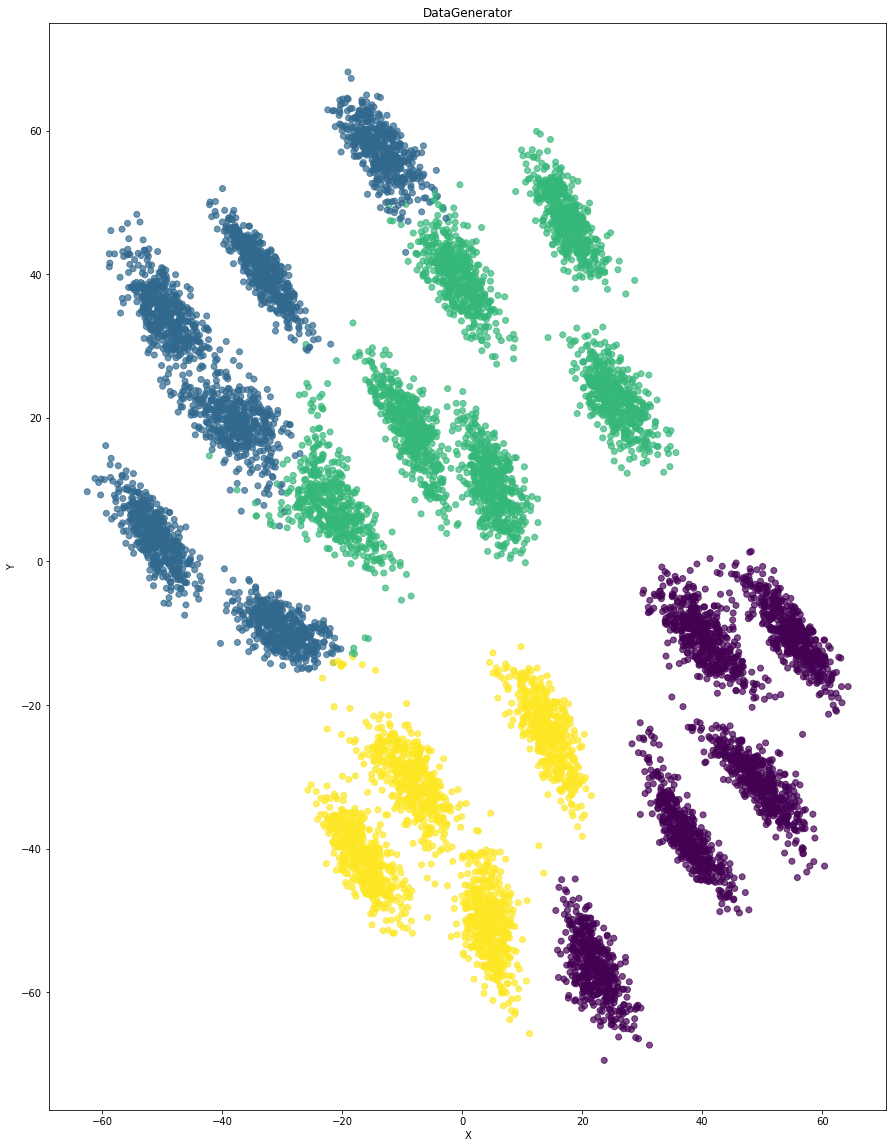

In [ ]:
plt.scatter(New_mds[:,0],New_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

# 4.เปรียบเทียบความแตกต่างของผลข้อ 2 กับ ข้อ 3

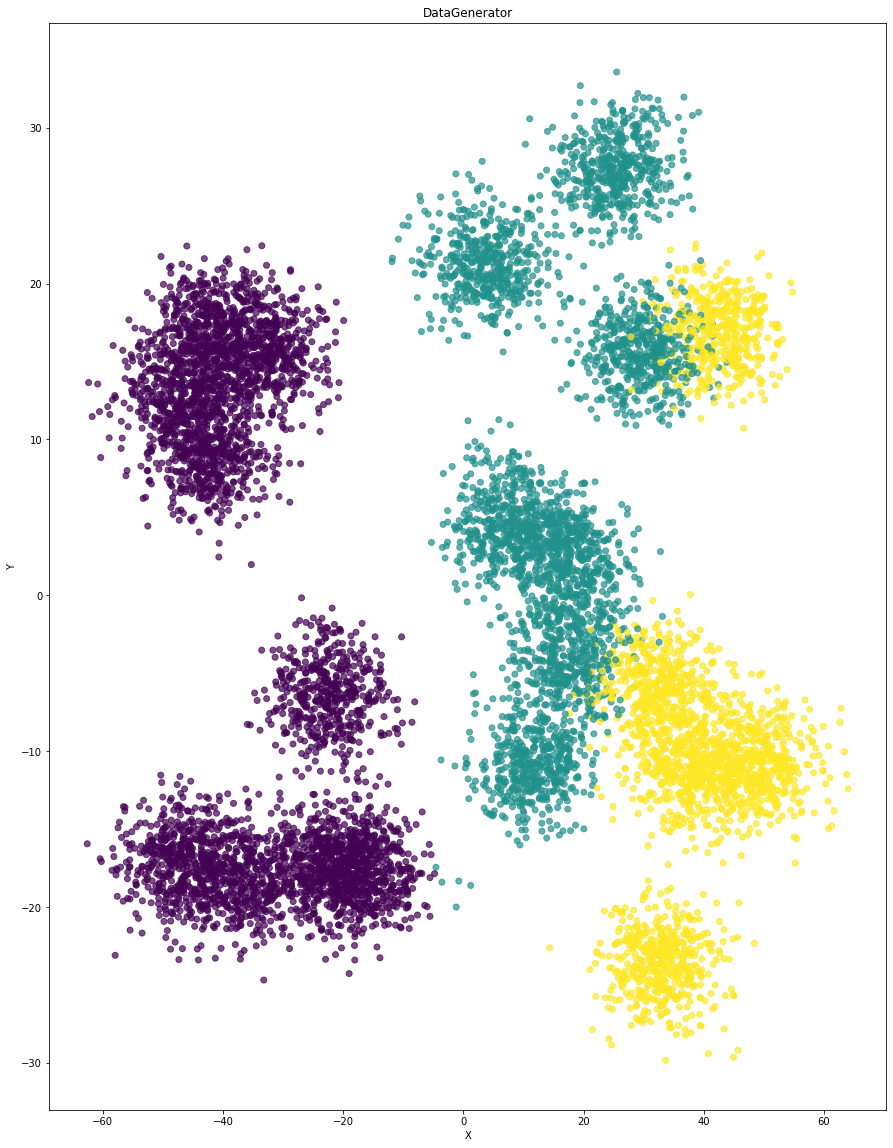

In [ ]:
# ข้อ 2
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

ข้อ 2  ->  ทำการจัดกลุ่มโดยการ clustering ก่อนที่จะทำการลด dimension ด้วยวิธี PCA ซึ่งเป็นการลด dimension โดยที่ทุกจุดของข้อมูลจะอยู่ที่เดิม

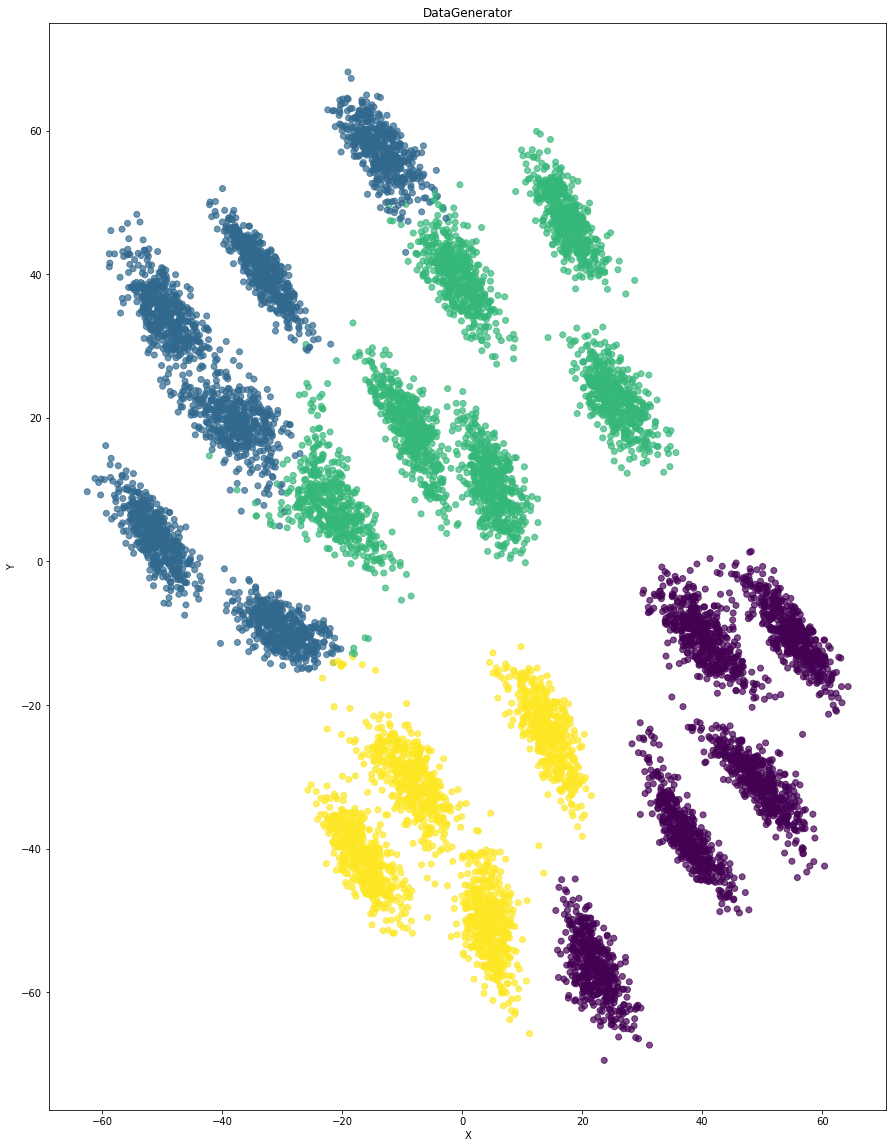

In [ ]:
# ข้อ 3
plt.scatter(New_mds[:,0],New_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

ข้อ 3  ->  ทำการลด dimension ของข้อมูลก่อน แล้วนำข้อมูลที่ลด dimension แล้วไปทำการ clustering ซึ่งทำการลด dimension ด้วยวิธี MDS ซึ่งลด dimension โดยที่ทุกจุดของข้อมูลจะยึดจุดตั้งต้นเป็นหลัก